In [15]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()

# See the key values
print("\nKey Values: \n", list(iris.keys()))

# The feature names
print("\nFeature Names: \n", list(iris.feature_names))

# The target names
print("\nTarget Names: \n", list(iris.target_names))

# The target values (codes)
print("\nTarget Values: \n", list(iris.target))


Key Values: 
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']

Target Values: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [3]:
# Data Matrix
X = iris["data"]

# Target Vector
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

X_train = X_train_scaled
X_test = X_test_scaled
X = X_scaled

In [35]:
def decision_boundary_svc_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min()-0.1, X[:, 0].max() + 0.1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min()-0.1, X[:, 1].max() + 0.1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contour plot for the distance of all points from the hyperplane and the two margins
        plt.contour(x1, x2, y_decision, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='black')
        
        
        #plt.pcolormesh(x1, x2, -y_decision, cmap=plt.cm.RdBu)
        
        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()

In [6]:
from itertools import combinations
pairs = combinations([0,1,2,3], 2)

x1 is feature 0
x2 is feature 1


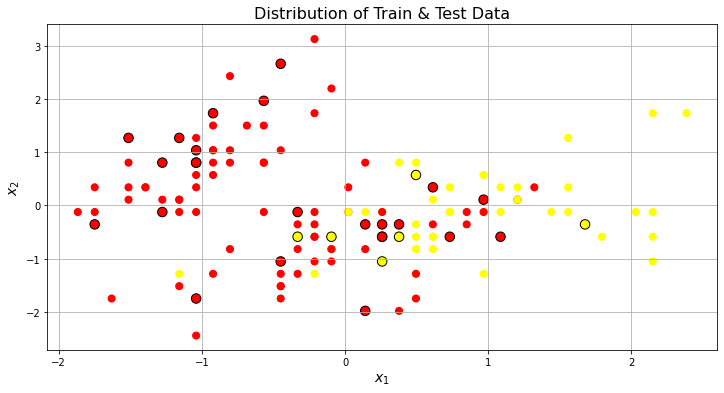

x1 is feature 0
x2 is feature 2


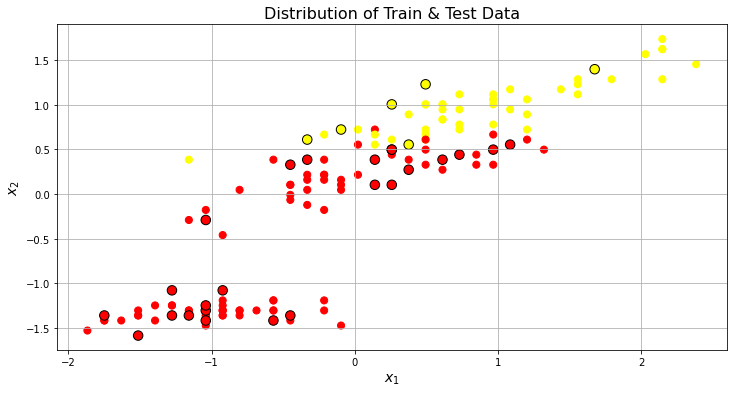

x1 is feature 0
x2 is feature 3


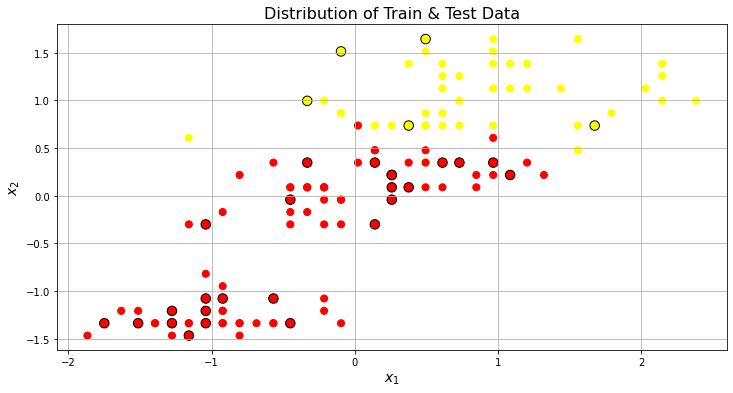

x1 is feature 1
x2 is feature 2


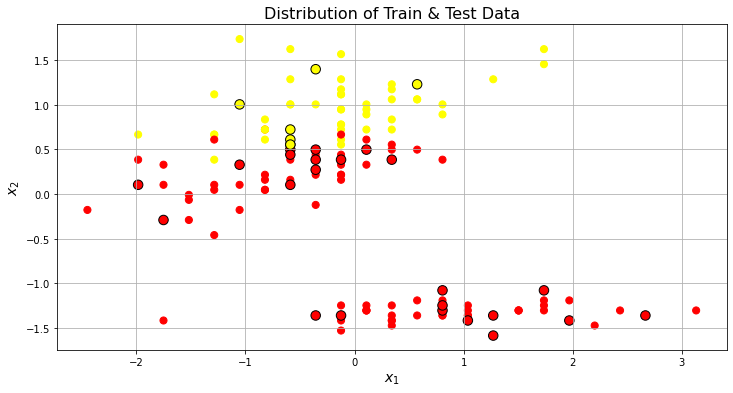

x1 is feature 1
x2 is feature 3


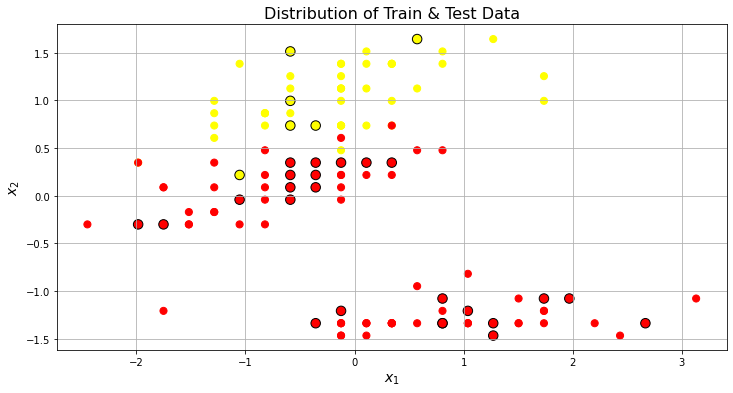

x1 is feature 2
x2 is feature 3


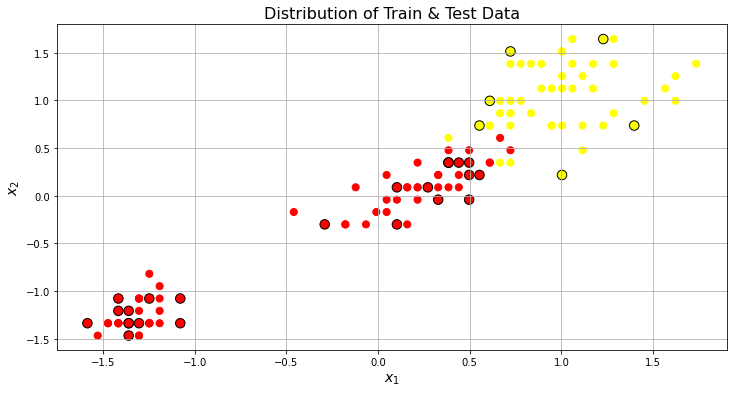

In [7]:
for i in pairs:
    print("x1 is feature " + str(i[0]))
    print("x2 is feature " + str(i[1]))
    plt.figure(figsize=(12, 6))

    plt.scatter(X_train[:, i[0]], X_train[:, i[1]], c=y_train, s=50, cmap='autumn')
    plt.scatter(X_test[:, i[0]], X_test[:, i[1]], c=y_test, s=90, cmap='autumn', alpha=1.0, edgecolors="k")

    plt.title("Distribution of Train & Test Data", fontsize=16)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    plt.grid(True, which='both')
    plt.show()

In [25]:
notable_pairs = [(0,3),
                 (1,3),
                 (2,3)]
dict = {0: 'sepal length', 1: 'sepal width', 2: 'petal length', 3: 'petal width'}

In [46]:
def visualize_parameters(pair, train, test):
    eff_X = X[:,[pair[0],pair[1]]]
    X_train = train[:,[pair[0],pair[1]]]
    X_test = test[:,[pair[0],pair[1]]]
    
    C_range = [10000000, 10000, 100, 10]
    gamma_range = [0.000001, 0.0001, 0.01, 0.1]
    classifiers = []
    testAccuracy = []
    for C in C_range:
        for gamma in gamma_range:
            clf = SVC(C=C, gamma=gamma)
            clf.fit(X_train, y_train)
            y_test_predicted = clf.predict(X_test)
            testAccuracy.append(clf.score(X_test, y_test))
            classifiers.append((C, gamma, clf))
    plt.figure(figsize=(18, 14))
    for (k, (C, gamma, clf)) in enumerate(classifiers):
        plt.subplot(len(C_range), len(gamma_range), k + 1)
        plt.title("$\\gamma$=%.6f, C=%.0f, \nTest Accuracy = %.2f, \n Feature x1: %s, Feature x2: %s" % (gamma, C, testAccuracy[k], dict.get(pair[0]), dict.get(pair[1])), size='medium')

        # visualize parameter's effect on decision function
        decision_boundary_svc_class_colored(clf, eff_X, plotDistanceFromHyperplane=True)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=90, cmap='autumn', alpha=1.0, edgecolors="k")
        plt.xticks(())
        plt.yticks(())    

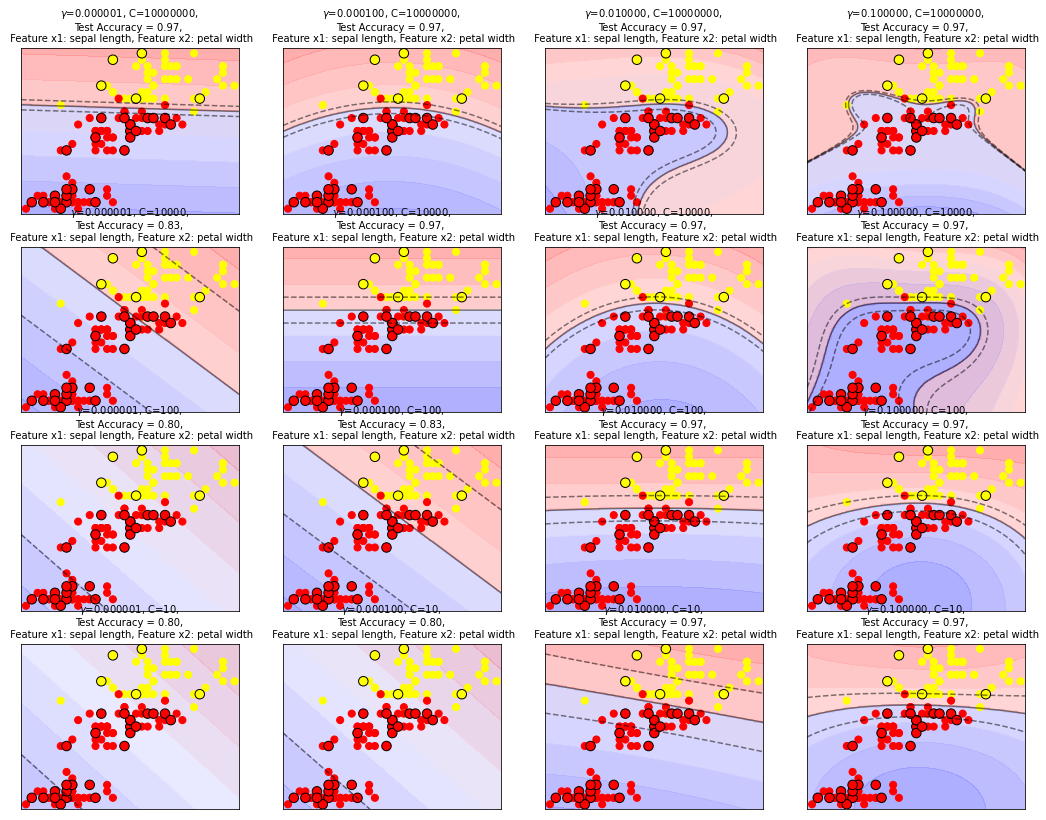

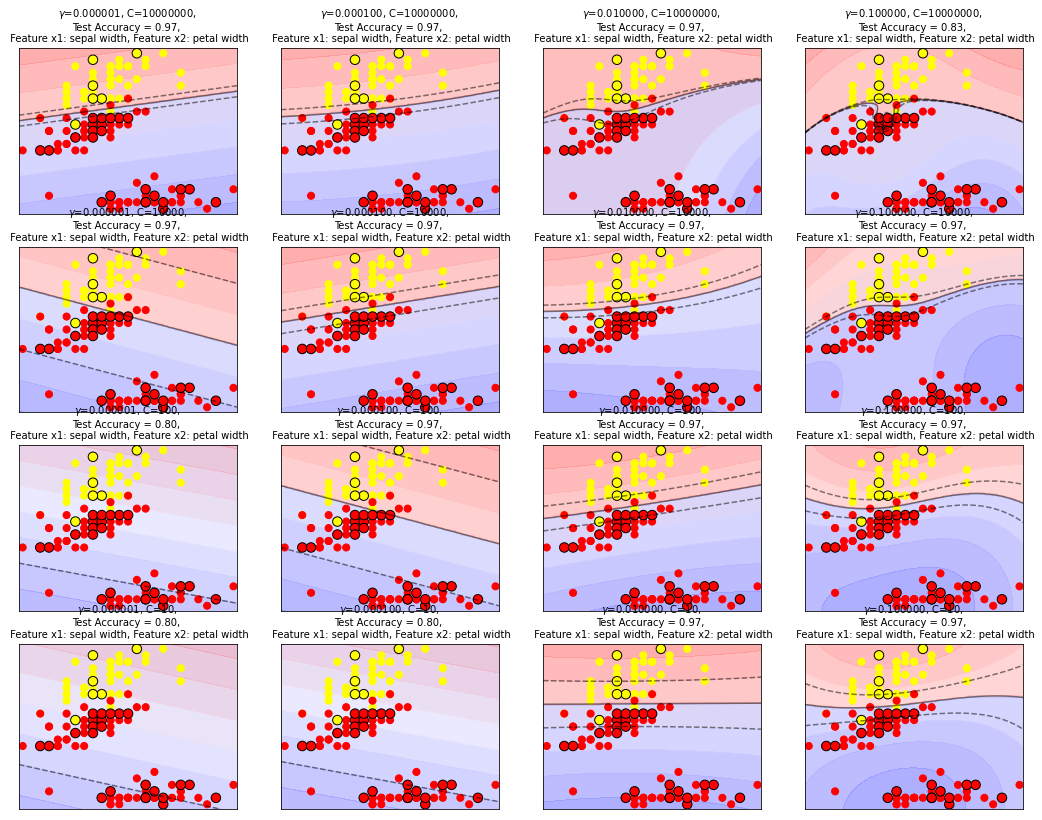

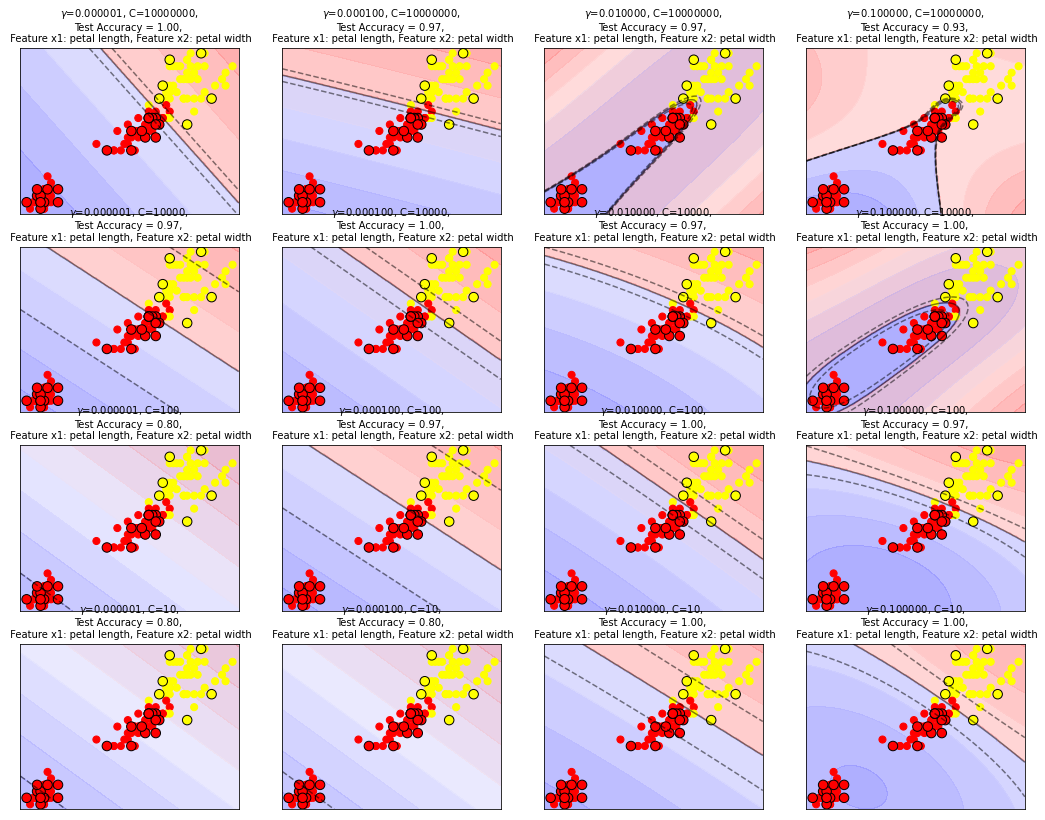

In [47]:
for i in notable_pairs:
    visualize_parameters(i, X_train, X_test)

In [48]:
eff_X = X[:,[2, 3]]
eff_X_train = X_train[:,[2, 3]]
eff_X_test = X_test[:,[2,3]]

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    0.4s finished


Best Score (accuracy): 0.958333
Optimal Hyperparameter Values:  {'C': 4, 'gamma': 0.011}




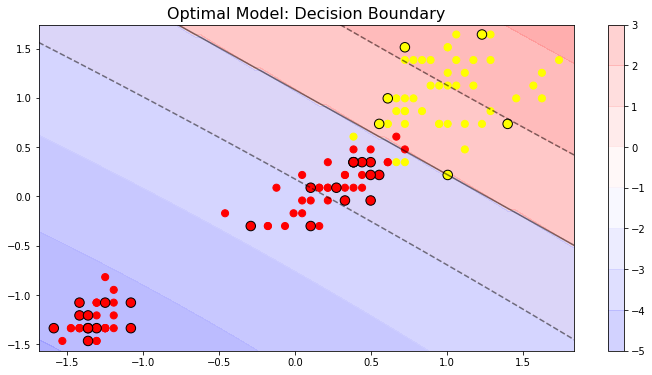

Training Accuracy:  0.95
Test Accuracy:  0.9666666666666667

Test Confusion Matrix:
[[24  0]
 [ 1  5]]

Test Precision = 1.000000
Test Recall = 0.833333
Test F1 Score = 0.909091

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30



In [54]:

param_grid = {'gamma': [0.008, 0.009, 0.01, 0.011, 0.012, 0.013], 
              'C': [1, 2, 3, 4, 5, 10, 50, 100, 250, 500, 1000]}
clf = SVC()

clf_cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5, verbose=True)
clf_cv.fit(eff_X_train, y_train)

params_optimal = clf_cv.best_params_

print("Best Score (accuracy): %f" % clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

svm_rbf_clf = SVC(kernel="rbf", **params_optimal)
svm_rbf_clf.fit(eff_X_train, y_train)

y_train_predicted = svm_rbf_clf.predict(eff_X_train)

plt.figure(figsize=(12, 6))
decision_boundary_svc_class_colored(svm_rbf_clf, eff_X, plotDistanceFromHyperplane=True, colorBar=True)
plt.scatter(eff_X_train[:, 0], eff_X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(eff_X_test[:, 0], eff_X_test[:, 1], c=y_test, s=90, cmap='autumn', alpha=1.0, edgecolors="k")
plt.title("Optimal Model: Decision Boundary", fontsize=16)
plt.show()


print("Training Accuracy: ", svm_rbf_clf.score(eff_X_train, y_train))
y_test_predicted = svm_rbf_clf.predict(eff_X_test)
print("Test Accuracy: ", svm_rbf_clf.score(eff_X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))